## Feature scaling
特徵縮放（Feature Scaling）是機器學習和數據分析中的一個重要步驟，用於處理特徵的數值範圍不同的情況。

### 為何要縮放處理

**第一點**，當不同特徵的數值範圍差異較大時，這可能會對許多機器學習算法的性能產生負面影響，因為這些算法可能會受到特徵值大小的影響。

Ex:

用年紀跟里程數做為特徵值，年紀的資料大概會落在18-80歲，里程可能是10幾萬不等，如此分析出來顯然結果會傾向於數值差較大的里程，想要獲得的結果，就會進行Feature Scaling。

**第二點**，當不同特徵的數值範圍差異較大時，兩者更新速度會差很多，不利於模型收斂

<img src="pics/comparision.png" alt="comparision" style="width: 700px">

假設有兩種數據，x1的範圍為[0, 10], x2的範圍為[0, 3]，大致建構一個目標函數圖(如上圖)。

在學習速率相同的情況下，x1對更新帶來的影響就會大於x2的影響，會需要迭代較多次來找到最佳解(左圖)。

當兩者範圍縮放至相同，更新速度變為一致，更容易透過梯度下降找到最佳解(右圖)。

而已我們會叫這種統一縮放至一定範圍的作法叫做**標準化**(Normalize)

## Normalize? or Standardlize?

<img src="pics/normalize&standardilize.png" alt="normalize&standardilize" style="width: 300px">

說實在的，都可以，不過就統計學的角度來看，只有normalization而沒有standardlization，因此我會建議使用Normalize就好。
若是要分出差別，兩者最大的差別在於是否改變資料分佈，normalize會等比例的縮放到0-1之間，standardlize會將縮放到平均數為 0 標準差為 1 的區間內(z-score)。


再進入個別fearute scaling方法之前會先需要樣本與母體的差別，以便詳細解釋一些方法的優缺點。

### 樣本標準差 v.s. 母體標準差
<img src="pics/deviation-n-n-1.png" alt="deviation-n-n-" style="width: 400px">

詳細原因如下，若是暫時無法理解則可先跳過，原因牽涉到自由度與不偏估計量，這邊先簡單帶過，之後會在其他地方詳細解釋。

[從標準差除以 n 或除以 n − 1 談起](https://web.math.sinica.edu.tw/math_media/d291/29102.pdf)

方法有很多種，下面會示範3種常見的normalization
1. Min-max normalization

2. Z-Score normalization

3. MaxAbs normalization

In [1]:
# 先來make data
import random
import numpy as np

seed_value = 42  
random.seed(seed_value)

data_num = 10000

height = np.random.normal(170, 5, data_num)
weight = np.random.normal(70, 5, data_num)


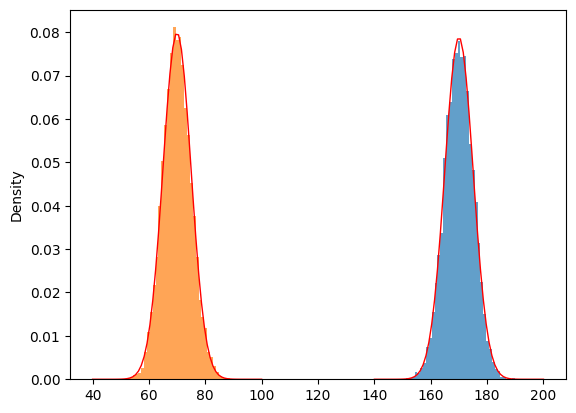

In [62]:
import matplotlib.pyplot as plt
from scipy.stats import norm

hist_height, bins_height, _ = plt.hist(height, bins=np.linspace(140, 200, 60), alpha=0.7, density=True)
kde_height = norm.pdf(bins_height, np.mean(height), np.std(height))
plt.plot(bins_height, kde_height, color='red', lw=1)

hist_weight, bins_weight, _ = plt.hist(weight, bins=np.linspace(40, 100, 60), alpha=0.7, density=True)
kde_weight = norm.pdf(bins_weight, np.mean(weight), np.std(weight))
plt.plot(bins_weight, kde_weight, color='red', lw=1)
plt.ylabel('Density')
plt.show()

### min-max normalization
<img src="pics/min-max.png" alt="min-max" style="width: 300px">

將資料**等比例**縮放到0和1之間，

* 優點 : 保留數據分佈關係

* 缺點 : 容易受極端值影響

用來保留稀疏矩陣中的零，或處理非常態分佈的資料。

In [63]:
def minmax_scale(data):
    min_val = min(data)
    max_val = max(data)
    result = []
    for d in data:
        v = (d-min_val)/(max_val-min_val)
        result.append(v)
        
    return np.array(result)

minmax_height = minmax_scale(height)
minmax_weight = minmax_scale(weight)

print("minmax scale後的height(前五個值) :", minmax_height[:5])
print("minmax scale後的weight(前五個值) :", minmax_weight[:5])

minmax scale後的height(前五個值) : [0.41294908 0.20211286 0.46145025 0.47426882 0.29357865]
minmax scale後的weight(前五個值) : [0.64383213 0.42313512 0.4908347  0.37664271 0.40541434]


In [65]:
#sklearn implement
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
min_max.fit_transform(height.reshape(-1, 1))

array([[0.41294908],
       [0.20211286],
       [0.46145025],
       ...,
       [0.48918048],
       [0.5722998 ],
       [0.39437049]])

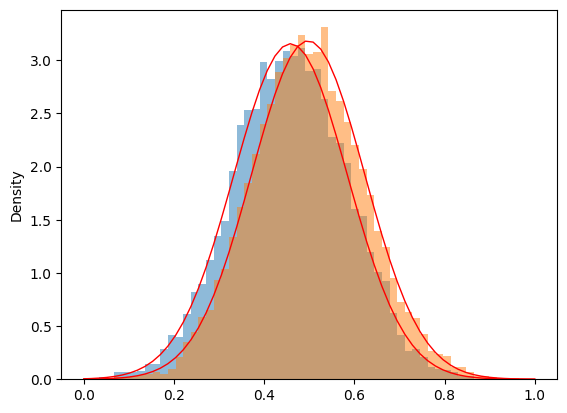

In [68]:
hist_height, bins_height, _ = plt.hist(minmax_height, bins=np.linspace(0, 1, 60), alpha=0.5, density=True)
kde_height = norm.pdf(bins_height, np.mean(minmax_height), np.std(minmax_height))
plt.plot(bins_height, kde_height, color='red', lw=1)

hist_weight, bins_weight, _ = plt.hist(minmax_weight, bins=np.linspace(0, 1, 60), alpha=0.5, density=True)
kde_weight = norm.pdf(bins_weight, np.mean(minmax_weight), np.std(minmax_weight))
plt.plot(bins_weight, kde_weight, color='red', lw=1)
plt.ylabel('Density')
plt.show()

### Zscore normalization

<img src="pics/z-score.png" alt="z-score" style="width: 270px">

把data轉換成均值為0,標準差為1的分佈

推導如下(math warning):

**平均值為0**

<img src="pics/z-score derive.png" alt="z-score derive" style="width: 320px">


**標準差為1**

<img src="pics/z-score derive2.png" alt="z-score derive2" style="width: 320px">

* 優點 : 可檢測出極端值，資料之間可比性高。
* 缺點 :對資料分佈要求嚴格(最好是常態分佈)，小樣本不適用。因為無單位，轉換出來的資料並無意義。

標準化中最常用到的方法。

In [9]:
def z_score(data):
    
    mean = sum(data) / len(data)
    var = [(value - mean)**2 for value in data]
    sum_of_var = sum(var)
    standard_deviation = (sum_of_var / (len(data) - 1)) ** 0.5
    zscores = [(d - mean) / standard_deviation for d in data]

    return np.array(zscores)

In [4]:
zscore_height = z_score(height)
zscore_weight = z_score(weight)

print("z-score後的height(前五個值) :", zscore_height[:5])
print("z-score後的weight(前五個值) :", zscore_weight[:5])

z-score後的height(前五個值) : [ 0.2553687   0.08991556 -0.65054534 -0.41995328  0.51992434]
z-score後的weight(前五個值) : [-0.5228538   2.25291956 -0.56170872 -0.13530988 -0.72498034]


In [5]:
# sklearn implement
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit_transform(height.reshape(-1, 1))

array([[ 0.25538146],
       [ 0.08992005],
       [-0.65057787],
       ...,
       [-0.41878037],
       [-1.52698584],
       [-0.76026513]])

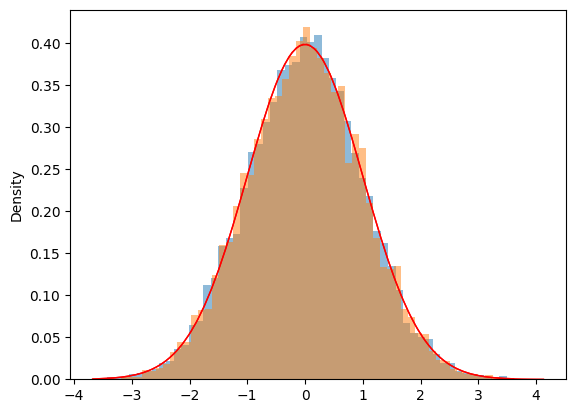

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import norm

hist_height, bins_height, _ = plt.hist(zscore_height, bins=60, alpha=0.5, density=True)
kde_height = norm.pdf(bins_height, np.mean(zscore_height), np.std(zscore_height))
plt.plot(bins_height, kde_height, color='red', lw=1)

hist_weight, bins_weight, _ = plt.hist(zscore_weight, bins=60, alpha=0.5, density=True)
kde_weight = norm.pdf(bins_weight, np.mean(zscore_weight), np.std(zscore_weight))
plt.plot(bins_weight, kde_weight, color='red', lw=1)
plt.ylabel('Density')
plt.show()

### MaxAbs normalization

<img src="pics/absmax.png" alt="absmax" style="width: 270px">

* 優點 : 保留正負值平衡。強調極端值。
* 缺點 : 忽略整體數據分佈，丟失較多訊息。

適合用來處理均值在0附近的資料或是稀疏矩陣。

In [10]:
def maxabs(data):
    
    maximun = max(abs(data))
    MaxAbs = [d / maximun for d in data]
    return np.array(MaxAbs)

In [11]:
maxabs_height = maxabs(height)
maxabs_weight = maxabs(weight)

print("maxabs後的height(前五個值) :", maxabs_height[:5])
print("maxabs後的weight(前五個值) :", maxabs_weight[:5])

maxabs後的height(前五個值) : [0.89776284 0.8933964  0.873855   0.87994052 0.90474469]
maxabs後的weight(前五個值) : [0.76406228 0.92248345 0.76184472 0.7861805  0.75252636]


In [13]:
from sklearn.preprocessing import MaxAbsScaler

MaxAbs = MaxAbsScaler()
MaxAbs.fit_transform(height.reshape(-1,1))

array([[0.89776284],
       [0.8933964 ],
       [0.873855  ],
       ...,
       [0.87997203],
       [0.85072701],
       [0.87096041]])

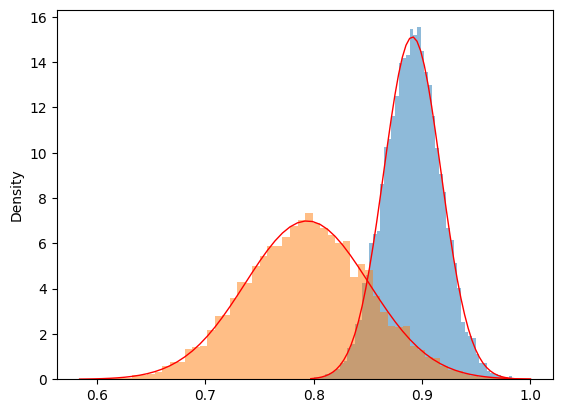

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import norm

hist_height, bins_height, _ = plt.hist(maxabs_height, bins=60, alpha=0.5, density=True)
kde_height = norm.pdf(bins_height, np.mean(maxabs_height), np.std(maxabs_height))
plt.plot(bins_height, kde_height, color='red', lw=1)

hist_weight, bins_weight, _ = plt.hist(maxabs_weight, bins=60, alpha=0.5, density=True)
kde_weight = norm.pdf(bins_weight, np.mean(maxabs_weight), np.std(maxabs_weight))
plt.plot(bins_weight, kde_weight, color='red', lw=1)
plt.ylabel('Density')
plt.show()

### **比較:** 
正規化（Normalization）和偏態處理（Skewness Correction）都是數據預處理的技術，用於改善數據的分佈或特性，但它們針對的問題和方法是不同的。

**標準化 (Normalization)：**
標準化是一種將數據轉換為一個特定範圍或分佈的過程，通常是將數據映射到某個標準範圍。正規化的主要目的是確保不同尺度的特徵或變數之間能夠在相同的範圍內進行比較，以避免某些特徵在模型訓練中佔據主導地位。常見的正規化方法包括最小-最大標準化、Z 分數標準化等。

**偏態處理（Skewness Correction）：**
偏態是指數據分佈的不對稱性，即數據在分佈中的一側有更多的數據點，而在另一側則較少。正偏態表示分佈右側的尾部更長，負偏態表示分佈左側的尾部更長。偏態處理的目標是調整數據的分佈，使其更接近正態分佈，從而有助於某些統計方法的應用，以及減少特徵對模型的影響。常見的偏態處理方法包括對數轉換、Box-Cox 轉換等。

正規化是為了確保特徵間的尺度一致，使它們在模型中能夠平等參與，而偏態處理則是為了調整數據的分佈，使其更接近正態分佈，以便於統計方法的應用。這兩種技術在數據預處理中可以分別用於解決不同的問題。

在模型訓練中，線性回歸，邏輯回歸，支援向量機，類神經網路等模型是需要normalize的，但決策樹模型則不需要，因為決策樹主要是透過資訊增益比(information gain ratio)跟特徵是否經過normalized無關。